### PoC Nutrition EDA :

**Table of content :** <br>
[📑 | General dataset observations](#obs)  <br>
[🔍 | Dataset vizualisation](#viz)  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[📊 | Multivariate plots](#multi)  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[📈 | Univeriate plots](#uni) <br>

In [8]:
import pandas as pd
import plotly
import plotly.express as px

# Mutliple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Plots for retina screens
%matplotlib inline
%config InlineBackend.figure_format='retina'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

df = pd.read_csv('../data/en.openfoodfacts.org.products_processed.csv')

print('⬆️ This contains imports & df.')

⬆️ This contains imports & df.


> ***Nota Bene*** <br>
> Those are the results on already processed data. The volume, yet corresponds to the current database situation. <br>

-----
#### 📑 | General dataset observations <a name='obs'></a> <br>

In [15]:
print('⬆️ This contains code that generates that ⬇️.\n')

print('\n-------------------------')

print('\nDataset structure :\n')
df.shape

print('\n-------------------------\n')


print('Count of missing values :\n')
missing_df = pd.DataFrame(df.isna().sum())
missing_df.T.style.applymap(lambda x: 'background-color : #ccc' if x>0 else '')

print('\n-------------------------\n')

print('Repartition of missing values (% >= 10):\n')
missing_df = missing_df.T
arr = []
for x in missing_df:
    val = missing_df[x].values[0]
    perc_missing_income = (val / len(df[x])) * 100
    arr.append([x, perc_missing_income.round(2),  f'{val} values'])
        
        
all_df_missing = pd.DataFrame(arr, columns=['Property', '%', 'N']).sort_values(by='%', ascending=False).reset_index()
all_df_missing = all_df_missing[all_df_missing['%'] >= 10]
all_df_missing

print('\n-------------------------\n')

print('Exploration on choosed features :\n')
targeted_columns = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g']
selected_df_missing = pd.DataFrame(arr, columns=['Property', '%', 'N']).sort_values(by='%', ascending=False)
selected_df_missing[selected_df_missing['Property'].isin(targeted_columns)]
print('\nGiven the `energy-kj_100g` important missing values (> 90%), we should propably avoid to work with this feature. However, we can fall back to the other energy\'s related fields.')

print('\n-------------------------\n')

⬆️ This contains code that generates that ⬇️.


-------------------------

Dataset structure :



(523, 186)


-------------------------

Count of missing values :



,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0,0,0,0,0,0,0,4,523,502,475,483,483,521,316,316,366,366,366,516,516,516,505,505,454,454,454,518,518,518,523,518,497,503,1,1,1,331,490,523,501,489,489,389,391,523,331,523,410,410,331,523,521,331,523,503,370,370,389,0,0,0,0,0,504,436,436,366,366,125,125,200,200,357,357,508,13,0,523,0,0,523,523,523,523,523,523,523,523,523,523,523,523,523,523,519,519,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,465,460,0,0,523,523,523,523,523,523,523,523,352,523,523,0,523,523,523,0,0,522,460,523,521,523,523,461,521,521,521,523,523,523,523,523,523,523,523,520,523,431,523,426,523,523,523,523,523,523,523,523,523,523,523,523,522,523,519,523,522,523,523,520,370,523,523,523,523,523,523,523,523



-------------------------

Repartition of missing values (% >= 10):



,index,Property,%,N
0,93,-montanic-acid_100g,100.00,523 values
1,117,-sucrose_100g,100.00,523 values
2,106,omega-9-fat_100g,100.00,523 values
3,107,-oleic-acid_100g,100.00,523 values
4,108,-elaidic-acid_100g,100.00,523 values
...,...,...,...,...
156,14,brands,60.42,316 values
157,71,image_ingredients_url,38.24,200 values
158,72,image_ingredients_small_url,38.24,200 values
159,69,image_url,23.90,125 values



-------------------------

Exploration on choosed features :



,Property,%,N
75,energy-kj_100g,97.13,508 values
76,energy-kcal_100g,2.49,13 values
80,saturated-fat_100g,0.00,0 values
79,fat_100g,0.00,0 values
132,salt_100g,0.00,0 values
128,proteins_100g,0.00,0 values
116,sugars_100g,0.00,0 values
115,carbohydrates_100g,0.00,0 values
77,energy_100g,0.00,0 values



Given the `energy-kj_100g` important missing values (> 90%), we should propably avoid to work with this feature. However, we can fall back to the other energy's related fields.

-------------------------



---------------
#### 🔍 | Dataset vizualisation <a name='viz'></a>

> 💡 For this part, python scripts responsible for plotting (and/or saving as html) can be found here `./scripts/generate_charts.py`. But here is a code extract :

```python
def genUni(df, mode='w'):
    '''Function that plot (if mode == s or ws), and returns
        a list of list of :
        - plot name
        - plot HTML div w/ JS script

     Mode :
        'w' : writes
        's' : show
        'ws' : write and show

    NB: mode other than w are meant to be used in a jupyter env
    '''
    divs = []
    for x in df.columns:
        fig = px.histogram(df[[x]], histnorm='percent')
        fig.layout.showlegend = False
        fig.update_layout(
            title=f'Univariate histogram of {x}:',
            font=dict(
                size=10
            )
        )
        divs.append([fig['layout']['title']['text'],
                     plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')])

    if (mode == 'w'):
        return divs
    elif (mode == 's'):
        fig.show()
        return False
    elif (mode == 'ws'):
        fig.show()
        return divs
    else:
        return False

```

<br>

>The script contains 3 methods :
> - `genMulti()` : generate multivariate scatter matrix
>- `genUni()` : generate univariate histogramm
>- `main()` : generate plots and save them to given folder

#### 📊 | Multivariate plots & 📈 | Univeriate plots <a name='uni'></a>

> Produced charts are visible on the demo app. Please visit the app's [/charts](https://localhost:8443/charts) to get the plot index and links. <br>
> Herebelow, you'll find a multivariate histogramm of the `sugars_100g` label.

⬆️ this made that ⬇️



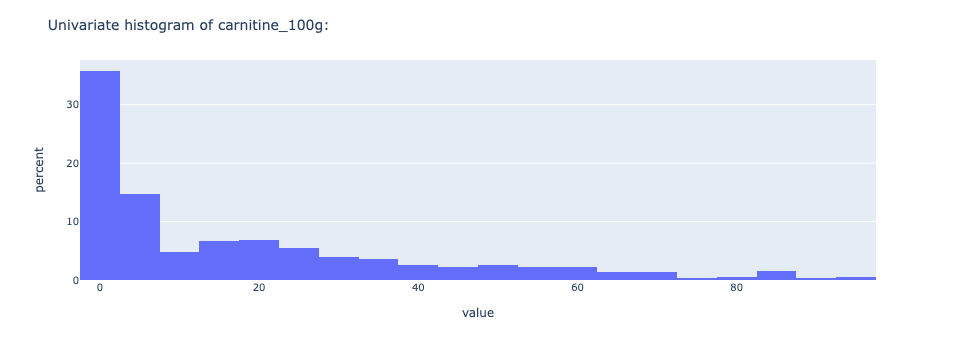

In [18]:
print('⬆️ this made that ⬇️\n')

fig = px.histogram(df[['sugars_100g']], histnorm='percent')
fig.layout.showlegend = False
fig.update_layout(
    title=f'Univariate histogram of {x}:',
    font=dict(
        size=10
    ))